In [14]:
import pandas as pd
import numpy as np

from IPython.display import display

# Wprowadzenie do zadań i metryk w uczeniu maszynowym [^autor]

[^autor]: Autor sekcji: {ref}`authors:filip-wojcik`.

w poprzednich rozdziałach omówiliśmy sobie podstawowe zagadnienia związane z teorią uczenia się - błędami generalizacji i dopasowania. Brakuje nam w tej układance jednego elementu - odpowiedzi na pytanie: **jak oceniać jakość modeli uczenia maszynowego?**. Względem jakich kryteriów?
Metryki oceny są uzależnione od **zadania, jakie dany model ma realizować**.

W niniejszym rozdziale przedstawione zostaną podstawowe pojęcia związane z funkcjami kosztu i straty, omówiony zostanie podział zadań w uczeniu maszynowym oraz zaprezentowane zostaną najważniejsze metryki oceny modeli.
Omówimy sobie:
1. Funkcje kosztu i straty - Funkcje kosztu i straty stanowią fundament w ocenie jakości modeli uczenia maszynowego. Są to funkcje matematyczne, które kwantyfikują różnicę pomiędzy przewidywaniami modelu a rzeczywistymi wartościami. Celem nauki modelu jest minimalizacja tej różnicy, co prowadzi do poprawy jego dokładności.
2. Podział zadań w uczeniu maszynowym
    Zadania w uczeniu maszynowym można podzielić na kilka głównych kategorii, z których najważniejsze to:
   - **Klasyfikacja**: Przypisywanie elementów do określonych klas.
   - **Klasyfikacja probabilistyczna**: Szczególny przypadek klasyfikacji, różniący się nieco metrykami oceny.
   - **Regresja**: Przewidywanie wartości ciągłych.
   - **Grupowanie (klasteryzacja)**: Grupowanie podobnych elementów w zbiory.
   - **Ranking**: Ustalanie kolejności elementów, szczególnie w systemach rekomendacyjnych.
3. Klasyfikację i jej metryki.
4. Regresję i jej metryki.
5. Grupowanie i jego metryki.
6. Ranking i jego metryki.

```{admonition} Inne zadania, inne metryki
:class: tip
Warto zauważyć, że niektóre specyficzne dziedziny uczenia maszynowego, takie jak analiza grafów czy analiza obrazów, mają swoje unikalne metryki oceny. Ten rozdział jednak skupia się na klasycznych, ogólnych metrykach stosowanych w różnych zadaniach uczenia maszynowego, zapewniając solidne podstawy do 
dalszego zgłębiania bardziej zaawansowanych zagadnień.
```

# Funkcje kosztu i straty

W uczeniu maszynowym funkcje kosztu i straty odgrywają kluczową rolę w ocenie i optymalizacji modeli. Stanowią one formalne narzędzie do kwantyfikacji różnic między przewidywaniami modelu a rzeczywistymi wartościami, co pozwala na iteracyjne doskonalenie modeli poprzez minimalizację tych różnic.

```{admonition} Brak jednej definicji
:class: tip

Nie ma konsensusu odnośnie definicji tych terminów wśród autorów i praktyków uczenia maszynowego. W praktyce często używa się ich zamiennie, choć niektórzy wyróżniają między nimi różnice. W niniejszym rozdziale przedstawimy obie definicje oraz ich wspólne rozumienie, jako alternatywny punkt widzenia.
```



```{glossary}
Funkcja straty
    (ang. *loss function*) - oznaczana abstrakcyjnie jako $\mathcal{L}(\hat{y}, y)$ mierzy różnice między predykcja modelu $\hat{y} = h(\mathbf{x}_i; \theta)$ (gdzie $h$ jest modelem/hipotezą uczenia maszynowego przewidującą wynik dla przykładu uczącego $\mathbf{x}$) a rzeczywistą wartością oczekiwaną dla danego przykładu uczącego.

Funkcja kosztu
    (ang. *cost function*) - oznaczana abstrakcyjnie jako $\mathcal{J}(\theta)$ mierzy różnice między predykcjami modelu a rzeczywistymi wartościami dla **całego zbioru danych uczących**. Jest to agregacja funkcji straty dla wszystkich przykładów uczących. Agregację można przeprowadzić za pomocą średniej, mediany lub podobnych miar. Funkcja kosztu nierzadko zawiera również komponent regularyzujący złożoność modelu (np. złożoność wag) uzyskując postać: 
    $J(\theta) = \text{AGG}\left\{ \mathcal{L}(\hat{y}_i, y_i), \forall i \in \mathcal{D} \right\} + \Omega(\theta)$
```

Definicje zamieszczone poniżej odnajdziemy w zbliżonej postaci m. in. w {cite:ps}`Ma2007CS229LN`, {cite:ps}`hastie2009elements`, {cite:ps}`goodfellow2016deep`. Co ciekawe, prof. Andrew Ng używa rozróżnia ang. *cost* i *loss function* w swoich kursach prowadzonych na platformie Coursera, **ale** w publikowanych materiałach Stanfordu do kursu CS229 posługuje się **czasami określeniem **cost** a czasem **cost/loss** function* dodając słowne określenie, czy mówi o funkcji dotyczącej wszystkich przykładów, czy całego zbioru danych.

Przykładowo:

1. W rozdziale 8 {cite:ps}`Ma2007CS229LN`, "Generalization" czytamy:
> (...) we typically learn a model $h(\theta)$ by minimizing a loss/cost function $J(\theta)$, which encourages $h(\theta)$ to fit the data. E.g., E.g., when the loss function is the least square loss (aka mean squared error), we have $J(\theta) = \frac{1}{n} \sum_{i=1}^{n} (y^{(i)} - h_\theta(x^{(i)}))^2$. This loss function for training purposes is oftentimes referred to as the training loss/error/cost.
2. W rozdziale 7.1. {cite:ps}`Ma2007CS229LN` "Deep learning" czytamy:
>  For simplicity, we start with the case where the output is a real number, that is, $y^{(i)} \in \mathbb{R}$ and thus the model $h(\theta)$ also outputs a real number (...). We define the least square cost function for the i-th example $(x^{(i)}, y^{(i)})$ as: $ J^{(i)}(\theta) = \frac{1}{2} (h_\theta(x^{(i)}) - y^{(i)})^2$, and define the mean-square cost function for the dataset as: $J(\theta) = \frac{1}{n} \sum_{i=1}^{n} J^{(i)}(\theta)$.


Z kolei Ian Goodfellow, uznany praktyk i naukowiec (do niedawna zaangażowany w DeepMind) w swojej książce "Deep Learning Book" {cite:ps}`goodfellow2016deep` w ogóle nie rozróżnia pojęć *loss / cost function* wprost, stosując je zamiennie i dodając, w definicji, czy opisuje funkcję dla pojedynczego przykładu czy dla całego zbioru danych.

```{admonition} Funkcje kosztu i straty w praktyce
:class: important
Nie chodzi nam tutaj o teoretyczne spory i rozważania. Ważna lekcja do zapamiętania ogranicza się do tych kilku punktów:
1. Możemy odróżniać funkcje opisujące błędy dla **pojedynczego przykładu**;
2. Wiele takich funkcji można **zagregować** (np. za pomocą średniej) i uzyskać funkcję kosztu dla całego zbioru danych, dodając np. karę za złożoność całego modelu;
3. Jeśli ktoś próbuje nam zarzucić, że źle używamy tych pojęć, to warto zwrócić uwagę, że nie ma zgody co do ich rozdziału wśród ekspertów.
```

# Klasyfikacja


```{glossary}
Klasyfikacja
    Klasyfikacja jest jednym z kluczowych zadań w uczeniu maszynowym, polegającym na przypisaniu obiektów do określonych kategorii (klas) na podstawie ich cech.
    Formalnie, klasyfikator jest funkcją $h: \mathcal{X} \rightarrow \mathcal{C}, \text{ gdzie } \mathcal{C} = \left\{c_1, c_2, \dots, c_k \right\}$, która przypisuje obiektom $x \in \mathcal{X}$ etykiety z zadanego, skończonego zbioru.
    Możemy wyróżnić dwa podstawowe typy klasyfikacji: klasyfikację binarną, gdzie mamy do czynienia z dwiema klasami, oraz klasyfikację wieloklasową, gdzie obiekt może należeć do jednej z wielu klas. W języku polskim określa się czasem zadnie klasyfikacji, mianem `taksonomii`.
    {cite:ps}`flach2012machine`, {cite:ps}`hastie2009elements`, {cite:ps}`Ma2007CS229LN`
```

Przyjrzyjmy się poniższym przykładom klasyfikacji binarnej i wieloklasowej.

## Przykłady klasyfikacji

### Klasyfikacja binarna

Jednym z klasycznych zbiorów danych, dla których pokazuje się przykłady klasyfikacji binarnej jest zbiór "Titanic", który zawiera informacje o pasażerach słynnego okrętu, w tym informacje o tym, **czy dany pasażer przeżył katastrofę czy nie**. Wolumen danych zawiera informacje demograficzne (płać, wielkość rodziny oraz jej obecność na statku), oraz związane z zajmowaną kabiną, opłatami, etc.

In [15]:
# Wczytywanie danych z pliku CSV
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
titanic_data = pd.read_csv(url)

# Przegląd pierwszych kilku wierszy
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
titanic_data.survived.value_counts(normalize=True).round(3)

survived
0    0.616
1    0.384
Name: proportion, dtype: float64

Widzimy, że proporcja klas wynosi około 2:1 (przeżył vs. nie przeżył), a zatem mamy do czynienia z problemem **niezbalansowanym**. Przekładając to na język formalny, możemy powiedzieć, że w przypadku zbioru danych `Titanic`:

$$\mathcal{C}_{\text{Ttianic}} = \left\{ \text{0}, \text{1} \right\}$$

gdzie 0 oznacza, że pasażer nie przeżył katastrofy, a 1, że przeżył.

### Klasyfikacja wieloklasowa

Przykładem klasyfikacji wieloklasowej, jest zbiór danych 'Iris', który zawiera informacje o trzech gatunkach irysów: `Iris-setosa`, `Iris-versicolor`, `Iris-virginica`. W tym przypadku mamy do czynienia z problemem **zbalansowanym**, ponieważ każda z klas ma tyle samo przykładów. Jest to chyba najczęściej wykorzystywany, w celach edukacyjnych, zbiór danych w uczeniu maszynowym.

In [17]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data["species"] = [iris.target_names[i] for i in iris.target]
iris_data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [18]:
iris_data.species.value_counts(normalize=True)

species
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: proportion, dtype: float64

Przekładając to na język formalny, możemy powiedzieć, że w przypadku zbioru danych `Iris`:

$$\mathcal{C}_{\text{Iris}} = \left\{ \text{Iris-setosa}, \text{Iris-versicolor}, \text{Iris-virginica} \right\}$$

## Kodowanie kategorii

Istotne jest zwrócenie uwagi na fakt, że (wbrew temu, jak zaimplementowane są niektóre algorytmy w poszczególnych bibliotekach), modele uczenia maszynowego **nie mogą przetwarzać etykiet klas w postaci tekstowej**. W rzeczywistości, muszą one być zakodowane w postaci numerycznej, np. za pomocą kodowania `one-hot`.

Istnieje wiele sposobów do osiągnięcia tego celu. Poniżej przedstawimy tylko podstawowe sposoby. Bardziej zaawansowane metody, jak np. `embedding` zostaną omówione w dalszej części książki, razem z modelami sieci neuronowych.


### One-hot encoding.

```{glossary}
Kodowanie typu one-hot
    (ang. *one-hot encoding*) - technika kodowania zmiennych kategorycznych w postaci wektorów binarnych, w których tylko jedna zmienna jest równa 1, a pozostałe 0. W przypadku klasyfikacji wieloklasowej, każda klasa jest kodowana jako wektor binarny, w którym jedna zmienna jest równa 1, a pozostałe 0.
    Jest to jedna z najprostszych metod kodowania numerycznego dla zmiennych kategorycznych. {cite:ps}`galli2022python`
```

Definicja tej metody jest bardziej skomplikowana, niż jej działanie w praktyce. "Przepis" na `one-hot encoding` jest bardzo prosty:
```{admonition} Kodowanie one-hot
:class: tip
1. Dla każdego obiektu w zbiorze danych, przygotuj wektor o długości równej ilości klas.
2. Nadaj klasom poszczególne indeksy (np. A - 0, B - 1, C - 2, etc.).
3. Dla każdego obiektu - wstaw "1" na pozycji wektora, odpowiadającej indeksowi klasy.
```

W praktyce, wiele bibliotek wykona tą pracę za nas.

W celach edukacyjnych, przyjrzyjmy się przykładowej, własnej implementacji.

#### One-hot encoding - własna implemetacja

In [19]:
def simple_ohe(df: pd.DataFrame, target_column: str) -> np.array:

    # Pobranie unikalnych wartości z kolumny docelowej
    unique_classes = list(df[target_column].unique())

    # Przygotowanie macierzy o wymiarach liczba_wierszy x liczba_unikalnych_klas
    ohe_vectors = np.zeros((len(df), len(unique_classes)))

    # Dla każdego obiektu - ustawienie wartości 1 w odpowiednim miejscu
    indices = df[target_column].apply(lambda v: unique_classes.index(v))

    # Ustawienie wartości 1 w odpowiednich miejscach
    ohe_vectors[np.arange(len(df)), indices] = 1

    # Pomocniczo stworzymy sobie DataFrame z etykietami kategorii
    ohe_df = pd.DataFrame(ohe_vectors, columns=unique_classes)

    return ohe_df

iris_simple_ohe = simple_ohe(iris_data, "species")

display(iris_simple_ohe.head(3))

display(iris_simple_ohe.tail(3))

,setosa,versicolor,virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0


,setosa,versicolor,virginica
147,0.0,0.0,1.0
148,0.0,0.0,1.0
149,0.0,0.0,1.0


#### One-hot encoding - użycie biblioteki 'feature-engine'

Biblioteka `feature-engine` jest jedną z wielu, które pozwalają na szybkie i łatwe kodowanie zmiennych kategorycznych. Poniżej przedstawimy przykład użycia tej biblioteki do osiągnięcia dokładnie tego samego efektu, co w przypadku własnej implementacji.

In [20]:
from feature_engine.encoding import OneHotEncoder

ohe = OneHotEncoder(variables=["species"], drop_last=False)
ohe.fit_transform(iris_data).head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0


Uzyskany efekt jest ten sam.


```{admonition} Kodowanie OHE dla danych treningowych i testowych
:class: important

Ważne jest, aby uczyć się kodować zmienne OHE na zbiorze **treningowym** i aplikować to samo kodowanie na zbiór **testowy**.

Naturalne pytanie pojawiające się w takim układzie to:

> Co, gdy w zbiorze testowym pojawi się nowa kategoria, której nie było w zbiorze treningowym?

W zależności od naszych zamiarów, modelu, oraz używanej biblioteki, można w dodać jedną, dodatkową kategorię `nieznane` / ang. *other*, która będzie obsługiwała takie przypadki. Warto zwrócić uwagę, że w przypadku niektórych modeli, takie rozwiązanie może prowadzić do problemów z interpretacją wyników.
```



```{admonition} Słabości metody OHE
:class: important

Metoda OHE jest bardzo prosta i intuicyjna, ale ma swoje wady. Jedną z nich jest to, że w przypadku zmiennych kategorycznych o dużej liczbie kategorii, może prowadzić do alokacji dużej macierzy opisujacej klasy. Nic dziwnego, skoro na potrzeby tego sposobu, tworzymy macierz o wymiarach `N x K` (gdzie K - liczba klas). Można temu zapobiegać stosujac tzw. macierze rzadkie (ang. *sparse matrices*), które są bardziej efektywne pod względem pamięciowym.

To jednak nie wszytko. Metoda OHE pomija zależności pomiedzy klasami, traktując jest wszytkie jednakowo. W przypadku, gdy zależności te są istotne, warto zastanowić się nad innymi metodami kodowania zmiennych kategorycznych, takimi jak `target encoding`, `weight of evidence`, czy `embedding`.
```

### Kodowanie numeryczne

Kodowanie numeryczne jest, w zasadzie pierwszym krokiem metody OHE. W tym przypadku, zamiast alokować macierz `N x K`, (gdzie K - liczba klas), alokujemy jednowymiarowy wektor o długości `N`, gdzie każda klasa jest zakodowana jako liczba całkowita, najczęściej jej indeks. Warto zwrócić uwagę, że w przypadku niektórych modeli, takie kodowanie może prowadzić do błędów interpretacyjnych, ponieważ model może traktować klasy jako zmienne numeryczne, a nie kategoryczne.

Bardzo często kodowanie numeryczne jest wykorzystywane przez biblioteki do optymalizacji pamięciowej metody OHE, w celu uniknięcia alokacji dużej macierzy.

## Metryki klasyfikacji binarnej

Teraz, gdy już wiemy, jak przygotować dane do modelu klasyfikacji, warto zastanowić się nad tym, jak ocenić jakość modelu. W tym celu, wykorzystuje się metryki klasyfikacji, które pozwalają na porównanie modeli pod kątem ich skuteczności.

Zaczniemy od omówienia metryk dla klasyfikacji binarnej.

### Macierz pomyłek

Podstawowym narzędziem oceny klasyfikacji jest tzw. **macierz pomyłek** (ang. *confusion matrix*), z której można wywodzić cały szereg dodatkowych metryk oceny jakości.

```{glossary}
Macierz pomyłek
    (ang. *confusion matrix*) - tabela, która pozwala na wizualizację wyników klasyfikacji binarnej. Zestawia ze sobą dwie składowe: liczność klas rzeczywistych (danych), oraz liczność predykcji modelu. W macierzy przedstawiane są cztery możliwe zależności, zachodzące między tymi składowymi:
    - **TP** (True Positive) - liczba poprawnie sklasyfikowanych obserwacji pozytywnych,
    - **TN** (True Negative) - liczba poprawnie sklasyfikowanych obserwacji negatywnych,
    - **FP** (False Positive) - liczba błędnie sklasyfikowanych obserwacji pozytywnych,
    - **FN** (False Negative) - liczba błędnie sklasyfikowanych obserwacji negatywnych.
    {cite:ps}`flach2012machine`, {cite:ps}`hastie2009elements`
```

Jeden obraz (i przykład) mówi więcej niż tysiąc słow, spójrzmy więc na poniższy przykład, wykorzystujący model zbiór danych Titanic i predykcje prostego modelu.

Wartości rzeczywiste:  [1 0 0 1 1 1 1 0 1 1]
Wartości przewidziane:  [0 1 0 1 1 1 1 0 0 1]
True Positives (TP):  54
True Negatives (TN):  83
False Positives (FP):  22
False Negatives (FN):  20


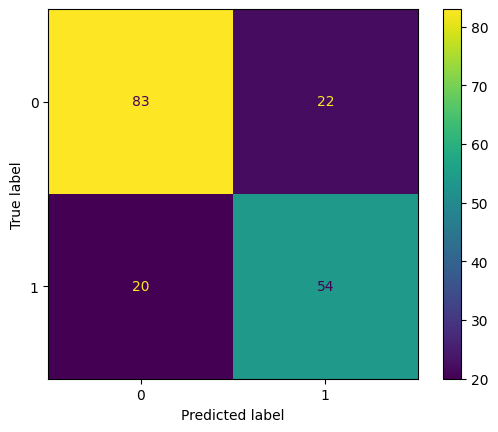

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer
from feature_engine.pipeline import make_pipeline
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

titanic_cols_to_take = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'adult_male']

# Wstępne przygotowanie danych - wypełnienie wart. brakujących i kodowanie OHE
num_imputer = MeanMedianImputer(imputation_method='median')
cat_imputer = CategoricalImputer(imputation_method='missing', fill_value='missing')
titanic_ohe = OneHotEncoder(variables=['sex', 'embarked', 'class', 'adult_male'], ignore_format=True)
transformation_pipe = make_pipeline(num_imputer, cat_imputer, titanic_ohe)

X = titanic_data.drop(columns=["survived"])[titanic_cols_to_take]
y = titanic_data["survived"]

# Podział danych na treningowe i testowe
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_titanic = transformation_pipe.fit_transform(X_train_titanic)
X_test_titanic = transformation_pipe.transform(X_test_titanic)

# Przygotowanie modelu
model_titanic = DecisionTreeClassifier(random_state=42)
model_titanic.fit(X_train_titanic, y_train_titanic)

# Ocena modelu
yhat_titanic = model_titanic.predict(X_test_titanic)

print("Wartości rzeczywiste: ", y_test_titanic.values[:10])
print("Wartości przewidziane: ", yhat_titanic[:10])

confmat = confusion_matrix(y_true=y_test_titanic, y_pred=yhat_titanic)

tn, fp, fn, tp = confmat.ravel()
print("True Positives (TP): ", tp)
print("True Negatives (TN): ", tn)
print("False Positives (FP): ", fp)
print("False Negatives (FN): ", fn)

ConfusionMatrixDisplay.from_predictions(y_test_titanic, yhat_titanic);

Obrazek powyżej pokazuje zestawienie predykcji i wartości oczekiwanych - wraz z ich pokrywaniem się. 

1. Suma każdego wiersza - to liczba obserwacji w danej klasie rzeczywistej.
2. Suma każdej kolumny - to liczba obserwacji w danej klasie predykcji.


### Podstawowe metryki

Jak widać powyżej, prosta macierz pomyłek daje nam szereg wartości, na podstawie których możemy wyliczać wiele metryk. Do najważniejszych należą {cite:ps}`flach2012machine`:

```{glossary}
Dokładność
    (ang. *accuracy*) - procent obserwacji, które zostały poprawnie sklasyfikowane przez model. Jest to jedna z najbardziej intuicyjnych metryk, ale może być myląca w przypadku niezbalansowanych zbiorów danych.

    $$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

Precyzja
    (ang. *precision*) - procent obserwacji sklasyfikowanych jako pozytywne, które są rzeczywiście pozytywne. Jest to metryka, która pozwala na ocenę jakości modelu/testu. Odpowiada na pytanie: "jak często model ma rację, gdy przewiduje pozytywny wynik?".

    $$\text{Precision} = \frac{TP}{TP + FP}$$

Czułość
    (ang. *recall* lub *sensitivity*) - procent obserwacji pozytywnych, które zostały poprawnie sklasyfikowane przez model. JOdpowiada na pytanie: "ile prawdziwie pozytywnych przypadków udało się wykryć".

    $$\text{Recall} = \frac{TP}{TP + FN}$$

Specyficzność
    (ang. *specificity*) - procent obserwacji negatywnych, które zostały poprawnie sklasyfikowane przez model. Odpowiada na pytanie: "ile prawdziwie negatywnych przypadków udało się wykryć".
    
    $$\text{Specificity} = \frac{TN}{TN + FP}$$
```

```{admonition} Warto znać metryki
:class: tip
Wśród niewielu rzeczy, których warto się uczyć na pamięć i znać na wylot, są podstawowe metryki klasyfikacji wywiedzione z macierzy pomyłek. Naprawdę warto jest pamiętać - przydaje się to niemal w każdej dyskusji i analizie dowolnego modelu klasyfikacji.
```

Zobaczmy, jak wyglądają wartości opisanych metryk, w przypadku modelu klasyfikacji binarnej dla danych Titanic.

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test_titanic, yhat_titanic)
precision = precision_score(y_test_titanic, yhat_titanic)
recall = recall_score(y_test_titanic, yhat_titanic)

specificity = tn / (tn + fp)

print(f"{'Dokładność / Accuracy':<30}: {accuracy:.3f}")
print(f"{'Precyzja / Precision':<30}: {precision:.3f}")
print(f"{'Czułość / Recall':<30}: {recall:.3f}")
print(f"{'Specyficzność / Specificity':<30}: {specificity:.3f}")

Dokładność / Accuracy         : 0.765
Precyzja / Precision          : 0.711
Czułość / Recall              : 0.730
Specyficzność / Specificity   : 0.790


Zachęcam, dla utrwalenia, do policzenia "ręcznie" tych wartości i upewnienia się, czy zgadzają się z wynikami poniżej :) 

### F1-score

Jak podkreślaliśmy wcześniej, metryka dokładności / *accuracy* nie jest najlepszym wyborem w przypadku, gdy zbiór danych nie jest zbalansowany. W takich przypadkach, warto zwrócić uwagę na metrykę F1-score, która jest średnią harmoniczną precyzji i czułości.


```{glossary}
Miara F1 (ang. F1-score)
    Miara F1 jest średnią harmoniczną precyzji i czułości. Jest to metryka jakości klasyfikacji binarnej, szczególnie przydatna w przypadku niezbalansowanych zbiorów danych. Przyjmuje wartości z zakresu [0, 1], gdzie 1 oznacza idealną klasyfikację, a 0 - całkowity brak trafności.
    Ze względu na swoje właściwości, jej wartości oscylują pomiędzy precyzją i czułością, zbiegając ku wartości mniejszej z nich. Dzięki temu Miara F1 pozwala wychwycić sytuacje niedoszacowania/przeszacowania kluczowych metryk. 
    Formalnie miarę F1 wyliczamy następująco:

    $$\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$

    {cite:ps}`flach2012machine`, {cite:ps}`sammut2017encyclopedia`
```

Rozpatrzmy następujący przykład, oparty na wydarzeniach, zwiazanych z pandemią COVID-19.

```{admonition} Przykład skrajnej nierównowagi klas - różnice w metrykach
Na początku pandemii COVID-19 trwał wyścig, mający na celu opracowanie jak najdokładniejszych testów, pozwalających na szybkie wykrycie zakażenia. Firmy farmaceutyczne i laboratoria badawcze zaczęły opracowywać testy, które miały jak najmniejsze ryzyko błędu. W przypadku testów na obecność wirusa, ważne jest, aby test był jak najbardziej czuły (wysoki, ang. *recall*), aby nie przegapić przypadków zakażenia. Zdarzały się również sytuacje, gdy testy nie wykrywały niczego, stając się bezużyteczne.

* Wyobraźmy sobie, że do punktu kontrolnego dostarczono **bardzo słaby test** - test, tylko w połowie przypadków wykrył wirusa.
* W kolejce do testowania czeka 100 pacjentów, z czego:
    - 90 jest zdrowych,
    - 10 jest chorych na nową odmianę wirusa.

Fragment kodu poniżej pokazuje wartości poszczególnych metryk dla tego testu.
```

In [23]:
from sklearn.metrics import f1_score, classification_report

# Kolejka 100 pacjentów: 90x"0" (zdrowy), 10 x "1" (chory)
patients = np.array([0] * 90  + [1] * 10)

# Wadliwy test, wykrył tylko połowę przypadków zakażenia
test_result = np.array([0] * 95 + [1] * 5)

# Wyliczenie metryk
accuracy = accuracy_score(patients, test_result)
precision = precision_score(patients, test_result)
recall = recall_score(patients, test_result)
f1 = f1_score(patients, test_result)

print(f"{'Dokładność / Accuracy':<30}: {accuracy:.3f}")
print(f"{'Precyzja / Precision':<30}: {precision:.3f}")
print(f"{'Czułość / Recall':<30}: {recall:.3f}")
print(f"{'F1':<30}: {f1:.3f}")

# Podsumowanie wszystkich metryk jednocześnie - bardzo przydatna funkcja
print("\n\n")
print(classification_report(patients, test_result))

Dokładność / Accuracy         : 0.950
Precyzja / Precision          : 1.000
Czułość / Recall              : 0.500
F1                            : 0.667



              precision    recall  f1-score   support

           0       0.95      1.00      0.97        90
           1       1.00      0.50      0.67        10

    accuracy                           0.95       100
   macro avg       0.97      0.75      0.82       100
weighted avg       0.95      0.95      0.94       100



Te wyniki nie napawają optymizmem, co więcej, **osoby nieznające się na ich interpretacji** mogłyby mylnie uznać, że wyniki są dobre.

1. **Dokładność** - 90% - wydaje się być bardzo wysoka, podobnie jak...
2. **Precyzja** - 100% - wszystkie przypadki, które test uznał za pozytywne, były rzeczywiście pozytywne. Dobrze, prada? Ale...
3. **Czułość** - 50% - tylko połowa przypadków pozytywnych została wykryta. To już nie wygląda tak dobrze.
4. **Miara F1** - 66.67% - średnia harmoniczna precyzji i czułości. Wciąż nie jest to wynik, który można uznać za zadowalający.

Dlatego tak ważne jest rozpatrywanie wielu metryk jednocześnie, a nie tylko kierowanie się pojedynczą wartością.

```{admonition} Wybór pojedynczej metryki
:class: tip
Czasem zdarza się, że trzeba wybrać pojedynczą wartość. Dzieje się tak np. przy optymalizacji modelu metodami automatycznymi, gdy wskazujemy **funkcję celu** wzgledem której optymalizator ma poprawiać wyniki. W takiej sytuacji, zwykle można wybrać miarę F1, która jest kompromisem pomiędzy precyzją i czułością.
```

## Metryki klasfikacji wieloklasowej

Klasyfikacja wieloklasowa to zadanie, w którym obiekty mogą być przypisane do jednej z wielu klas. W takim przypadku, metryki klasyfikacji binarnej nie są wystarczające, ponieważ nie uwzględniają wszystkich klas.Na całe szczęście, jak słusznie zwracają na to uwagę niektórzy autorzy {cite:ps}`flach2012machine`, {cite:ps}`mohri2012foundations`, każdy problem klasyfikacji wieloklasowej da się sprowadzić do serii problemów klasyfikacji binarnej.

W poniższym omówieniu wykorzystamy zbiór danych `Iris`, przedstawiony już wcześniej, jako klasyczny przykład tego zadania.

In [24]:
iris_data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [25]:
from feature_engine.encoding import OrdinalEncoder

# Kodowanie numeryczne klas - tym razem nie używamy OHE
ordinal_encoder = OrdinalEncoder(encoding_method='arbitrary', variables=['species'])
iris_encoded  = ordinal_encoder.fit_transform(iris_data)



# Podział na dane treningowe i testowe
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(iris_encoded.drop(columns=["species"]),
                                                    iris_encoded["species"],
                                                    test_size=0.2,
                                                    random_state=42)


X_train_iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4


In [26]:
# Jak zostały zakodowane nasze klasy?
ordinal_encoder.encoder_dict_

{'species': {'setosa': 0, 'versicolor': 1, 'virginica': 2}}

### Macierz pomyłek dla klasyfikacji wieloklasowej

W przypadku klasyfikacji wieloklasowej macierz pomyłek jest rozszerzeniem macierzy pomyłek dla klasyfikacji binarnej. W przypadku klasyfikacji wieloklasowej, macierz pomyłek jest macierzą kwadratową, w której wiersze odpowiadają klasom rzeczywistym, a kolumny klasom predykcji, tak samo, jak wcześniej.

Przykład poniżej:

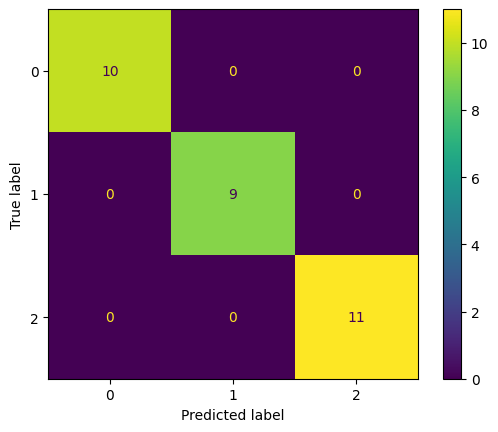

In [27]:
decision_tree_iris = DecisionTreeClassifier(random_state=42)
decision_tree_iris.fit(X_train_iris, y_train_iris)

yhat_iris = decision_tree_iris.predict(X_test_iris)

ConfusionMatrixDisplay.from_predictions(y_test_iris, yhat_iris);

### Precyzja, czułość i miara F1 dla klasyfikacji wieloklasowej


W klasyfikacji wieloklasowej, gdy model generuje predykcje dla wielu klas, potrzebujemy sposobu, by ocenić jego ogólną skuteczność na podstawie metryk takich jak precyzja, czułość, czy miara F1. Zazwyczaj używa się trzech głównych podejść do agregacji tych metryk: **micro-average**, **macro-average** oraz **weighted-average**. Każde z nich różni się sposobem obliczania średniej, co może prowadzić do różnych interpretacji wyników.

#### 1. **Micro-average**

**Micro-average** to metoda obliczania średnich metryk (np. precyzji, czułości, F1), która traktuje każdą obserwację równo, bez względu na przynależność do klasy. W podejściu *micro-average*, wszystkie prawdziwe pozytywne, fałszywe pozytywne i fałszywe negatywne są sumowane przez wszystkie klasy, a następnie na tej podstawie obliczana jest metryka.

$$
\begin{align}
\text{Precision}_{micro} &= \frac{\sum_{i=1}^{K} TP_i}{\sum_{i=1}^{K} (TP_i + FP_i)} \\[1em]
\text{Recall}_{micro} &= \frac{\sum_{i=1}^{K} TP_i}{\sum_{i=1}^{K} (TP_i + FN_i)} \\[1em]
\text{F1-score}_{micro} &= \frac{2 \times \text{Precision}_{micro} \times \text{Recall}_{micro}}{\text{Precision}_{micro} + \text{Recall}_{micro}}
\end{align}
$$

**Przykład:**

Załóżmy, że mamy trzy klasy (A, B, C) i następujące dane:

- TP (True Positives): A = 40, B = 30, C = 50
- FP (False Positives): A = 10, B = 15, C = 5
- FN (False Negatives): A = 20, B = 25, C = 10

Wówczas:

$$
\begin{align}
\text{Precision}_{micro} &= \frac{40 + 30 + 50}{(40 + 30 + 50) + (10 + 15 + 5)} = \frac{120}{150} = 0.80 \\[1em]
\text{Recall}_{micro} &= \frac{40 + 30 + 50}{(40 + 30 + 50) + (20 + 25 + 10)} = \frac{120}{175} = 0.686 \\[1em]
\text{F1-score}_{micro} &= \frac{2 \times 0.80 \times 0.686}{0.80 + 0.686} = 0.737
\end{align}
$$



#### 2. **Macro-average**

**Macro-average** oblicza metryki dla każdej klasy indywidualnie, a następnie średnia arytmetyczna tych metryk jest brana jako ostateczny wynik. W przeciwieństwie do micro-average, macro-average nie bierze pod uwagę rozkładu klas, co oznacza, że rzadkie klasy mają taki sam wpływ na końcową metrykę, jak klasy bardziej licznie reprezentowane.

$$
\begin{align}
\text{Precision}_{macro} &= \frac{1}{K} \sum_{i=1}^{K} \text{Precision}_i \\
\text{Recall}_{macro} &= \frac{1}{K} \sum_{i=1}^{K} \text{Recall}_i \\
\text{F1-score}_{macro} &= \frac{1}{K} \sum_{i=1}^{K} \text{F1-score}_i
\end{align}
$$


**Przykład:**

Używając tych samych danych co wcześniej:

$$
\begin{align}
\text{Precision}_A &= \frac{40}{40 + 10} = 0.80 \\
\text{Precision}_B &= \frac{30}{30 + 15} = 0.667 \\
\text{Precision}_C &= \frac{50}{50 + 5} = 0.909 \\
\text{Precision}_{macro} &= \frac{0.80 + 0.667 + 0.909}{3} = 0.792
\end{align}
$$


Podobnie obliczamy recall i F1-score dla każdej klasy, a następnie ich średnią.



#### 3. **Weighted-average**

**Weighted-average** (średnia ważona) to metoda, która podobnie jak macro-average, oblicza metryki dla każdej klasy indywidualnie, ale uwzględnia przy tym rozkład klas. Każda metryka dla danej klasy jest ważona liczbą przykładów w tej klasie.

$$
\begin{align}
\text{Precision}_{weighted} &= \frac{1}{N} \sum_{i=1}^{K} n_i \times \text{Precision}_i \\
\text{Recall}_{weighted} &= \frac{1}{N} \sum_{i=1}^{K} n_i \times \text{Recall}_i \\
\text{F1-score}_{weighted} &= \frac{1}{N} \sum_{i=1}^{K} n_i \times \text{F1-score}_i
\end{align}
$$

gdzie $n_i$ to liczba próbek w klasie $i$, a $N$ to całkowita liczba próbek we wszystkich klasach.

**Przykład:**

Załóżmy, że liczby próbek w klasach są następujące:

- Liczba próbek: A = 70, B = 70, C = 65

Wówczas, weighted-average precision będzie obliczona jako:

$$
\text{Precision}_{weighted} = \frac{70 \times 0.80 + 70 \times 0.667 + 65 \times 0.909}{70 + 70 + 65} = \frac{161.775}{205} = 0.78
$$

### Podsumowanie

Jak widać w przykładach powyżej - nawet dla tych smaych metryk (precyzji/czułośći/F1) - wyniki mogą się różnic, w zależności od uśrednienia. Ostateczny wybór zależy od konkretnej sytacji i tego, jak model ma być oceniany.

```{admonition} Sugerowane metody wyboru uśrednienia
:class: tip
- **Micro-average** jest odpowiednie, gdy zależy nam na ocenie ogólnej skuteczności modelu niezależnie od rozkładu klas.
- **Macro-average** jest przydatne, gdy interesuje nas równomierna ocena skuteczności modelu dla każdej klasy, bez względu na liczebność klas.
- **Weighted-average** zapewnia bardziej zbalansowaną ocenę, uwzględniając zarówno skuteczność dla każdej klasy, jak i ich liczebność, co jest szczególnie użyteczne w przypadkach, gdy rozkład klas jest nierównomierny.
```

# Klasyfikacja probabilistyczna

W poprzednich rozdziałach zagadnienie klasyfikacji zostało przedstawione w nieco uproszczony sposób, zakładając, że wynikiem działania modelu jest bezpośrednie przypisanie obserwacji do jednej z klas. W rzeczywistości większość modeli uczenia maszynowego zwraca prawdopodobieństwa przynależności do klas, a nie same przypisania. Domyślnie przyjmuje się poziom odcięcia (ang. *threshold*) równy 0.5, co oznacza, że jeżeli prawdopodobieństwo przynależności do danej klasy przekracza tę wartość, to model przypisuje obserwację do tej klasy. Jednak w praktyce próg ten może być dostosowywany w zależności od potrzeb konkretnej aplikacji.

Formalnie zapisujemy:

$$
\hat{y} = \begin{cases}
1 & \text{jeżeli } p(y=1 | x) > \text{threshold} \\
0 & \text{w przeciwnym przypadku}
\end{cases}
$$

dla klasyfikacji binarnej.

```{admonition} Wyjście z modelu w klasyfikacji probabilistycznej
:class: tip
W przypadku klasyfikacji probabilistycznej - model zwraca prawdopodobieństwa przynależności do klas, a nie same przypisania. Tym samym wynik działania modelu jest macierzą o wymiarach `N x K`, gdzie K = liczba klas, a N = liczba obserwacji. Jest zatem podobny w swoim kształcie do wyniku działania kodowania OHE.
```


## Metryki dla klasyfikacji probabilistycznej

Klasyfikacja probabilistyczna wprowadza dodatkowe możliwości oceny jakości modelu. Zamiast oceniać model na podstawie przypisanych klas, możemy skupić się na tym, jak dobrze model przewiduje prawdopodobieństwa przynależności do klas. Poniżej przedstawiamy kilka najważniejszych metryk oraz narzędzi używanych do oceny modeli probabilistycznych.

### Log-Loss (funkcja logarytmiczna straty) i Cross-Entropy (entropia krzyżowa)

*Log-loss* oraz *cross-entropy* to kluczowe metryki używane do oceny modeli probabilistycznych, zwłaszcza w przypadku klasyfikacji wieloklasowej. Metryki te mierzą, jak bardzo przewidywane prawdopodobieństwa odbiegają od rzeczywistych etykiet.

```{glossary}
Log-loss

    Dla klasyfikacji binarnej *log-loss* jest definiowany jako {cite:ps}`hastie2009elements`:

    $$
    \text{Log-loss} = -\frac{1}{N} \sum_{i=1}^{N} \left[ \textcolor{red}{y_i \log(p_i)} + \textcolor{blue}{ (1 - y_i) \log(1 - p_i)} \right]
    $$

    gdzie:
    - $ y_i $ to rzeczywista etykieta (0 lub 1),
    - $ p_i $ to przewidywane prawdopodobieństwo dla klasy 1,
    - $ N $ to liczba próbek.
```

Ciekawą własnością tego równania jest fakt, że w zależności od klasy docelowej, "aktywna" jest tylko jedna jeggo część, a druga się zeruje.
1. W przypadku, gdy $y=1$, wówczas zaznaczona na niebiesko część równania ulega wyzerowaniu, bo $y_i = 1$, a więc $1 - y_i = 0$. A zatem rozpatrujemy tylko część "czerwoną" - iloczyn przewidzianego prawdopodobieństwa i rzeczywistej etykiety.
2. Analogicznie, gdy $y=0$, to zaznaczona na czerwono część równania ulega wyzerowaniu, bo $y_i = 0$, a więc $1 - y_i = 1$. A zatem rozpatrujemy tylko część "niebieską" - iloczyn przewidzianego prawdopodobieństwa i rzeczywistej etykiety.

```{glossary}
Entropia krzyżowa / ang. *cross entropy*
    Dla klasyfikacji wieloklasowej, *cross-entropy* (która jest rozszerzeniem *log-loss*) jest definiowana jako {cite:ps}`hastie2009elements`:


    $$
    \text{Cross-Entropy} = -\frac{1}{N} \sum_{i=1}^{N} \sum_{c=1}^{C} y_{i,c} \log(p_{i,c})
    $$

    gdzie:
    - $ C $ to liczba klas,
    - $ y_{i,c} $ to wskaźnik binarny czy próbka $ i $ należy do klasy $ c $ (1 lub 0),
    - $ p_{i,c} $ to przewidywane prawdopodobieństwo, że próbka $ i $ należy do klasy $ c $.
```

Przykład kodu w Pythonie obliczającego *log-loss* oraz *cross-entropy*:

In [28]:
from sklearn.metrics import log_loss
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

# Trenowanie modelu logistycznej regresji
logreg_iris = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg_iris.fit(X_train_iris, y_train_iris)

# Przewidywanie prawdopodobieństw
y_prob_iris = logreg_iris.predict_proba(X_test_iris)

# Przykładowe prawdopodobieństwa dla pierwszych 3 obiektów
# Macierz N x 3. Drugi wymiar (=3) odpowiada ilości klas.
display(y_prob_iris[:3])

# Obliczanie log-loss (cross-entropy) dla wieloklasowej klasyfikacji
log_loss_value = log_loss(y_test_iris, y_prob_iris)
print(f'Log-Loss / Cross-Entropy: {log_loss_value:.4f}')

/home/filip/miniconda3/envs/dsbook/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


array([[3.80467719e-03, 8.27741160e-01, 1.68454163e-01],
       [9.46983711e-01, 5.30160908e-02, 1.98729666e-07],
       [8.86544005e-09, 1.54858232e-03, 9.98451409e-01]])

Log-Loss / Cross-Entropy: 0.1111


### **Krzywa ROC i AUC (Receiver Operating Characteristic i Pole pod Krzywą ROC)**

```{glossary}
Krzywa ROC 
    ang. **Receiver Operating Characteristic** jest wykresem, który pokazuje zależność pomiędzy czułością (ang. *True Positive Rate, TPR* lub *Recall*) a współczynnikiem fałszywie pozytywnych wyników (ang. *False Positive Rate, FPR*) przy różnych poziomach odcięcia (ang. *threshold*) prawdopodobieństwa. Pole pod krzywą ROC (ang. *Area Under the Curve, AUC*) jest miarą jakości modelu – im większe pole, tym lepszy model.

    Innymi słowy, krzywa ROC i AUC pomaga sprawdzić, czy na pewno domyślny próg 0.5 jest najlepszym wyborem dla modelu klasyfikacji probabilistycznej.
```

Wzory na *True Positive Rate* oraz *False Positive Rate*:

$$
\text{TPR} = \frac{TP}{TP + FN}
$$

$$
\text{FPR} = \frac{FP}{FP + TN}
$$

Przykład kodu w Pythonie generującego krzywą ROC i obliczającego AUC, dla binarnej klasyfikacji dla danych z Titanica.


ROC AUC: 0.7808


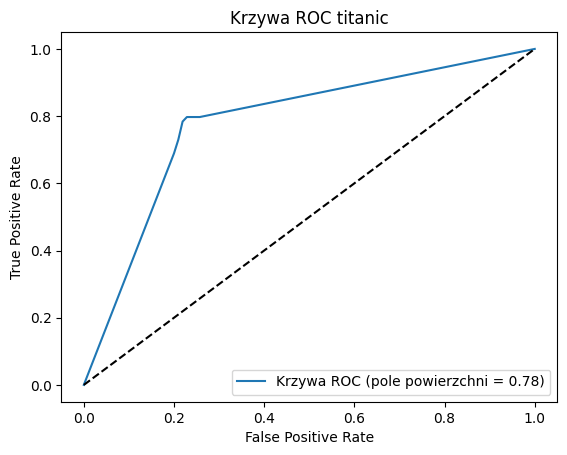

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predycke prawdopodobieństwa dla danych zw z katastrofą Titanica
yhat_titanic_proba = model_titanic.predict_proba(X_test_titanic)

# Obliczanie krzywej ROC
fpr, tpr, thresholds = roc_curve(y_test_titanic, yhat_titanic_proba[:, 1])

# Obliczanie AUC
auc = roc_auc_score(y_test_titanic, yhat_titanic_proba[:, 1])
print(f'ROC AUC: {auc:.4f}')

# Rysowanie krzywej ROC
plt.plot(fpr, tpr, label=f'Krzywa ROC (pole powierzchni = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Linia przerywana (losowy klasyfikator)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC titanic')
plt.legend(loc="lower right")
plt.show()


Jak widać w powyższym przykładzie - model wyszkolony dla danych związanych z katastrofą Titanica, zdecydowanie przewyższa wyniki losowego klasyfikatora.

### **Krzywa precision-recall i AUC (Precision-Recall Curve i Pole pod Krzywą Precision-Recall)**

Krzywa *precision-recall* jest alternatywą dla krzywej ROC, szczególnie przydatną w przypadku, gdy klasy są niezrównoważone.

Przykład kodu generującego tą krzywą dla danych zw. z katastrofą Titanica.


Precision-Recall AUC: 0.7771


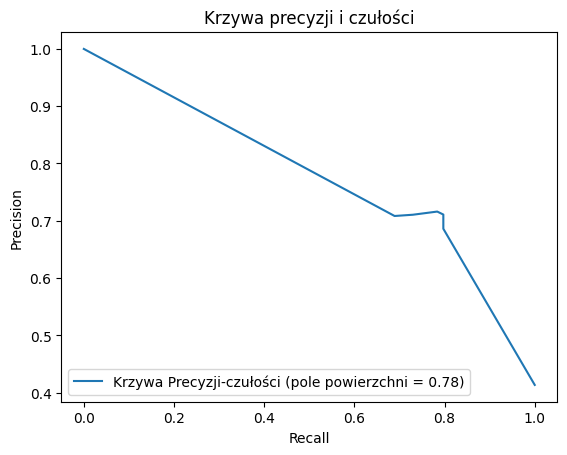

In [30]:
from sklearn.metrics import precision_recall_curve, auc

# Obliczanie krzywej precision-recall
precision, recall, thresholds = precision_recall_curve(y_test_titanic, yhat_titanic_proba[:, 1])

# Obliczanie AUC dla krzywej precision-recall
pr_auc = auc(recall, precision)
print(f'Precision-Recall AUC: {pr_auc:.4f}')


plt.plot(recall, precision, label=f'Krzywa Precyzji-czułości (pole powierzchni = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Krzywa precyzji i czułości')
plt.legend(loc="lower left")
plt.show()

### Kalibracja Prawdopodobieństwa

Kalibracja prawdopodobieństwa jest procesem dostosowywania prognoz modelu, aby lepiej odpowiadały rzeczywistym prawdopodobieństwom. W ramach tego procesu, steruje się progiem odcięcia/przypisania, zilustrowanym powyżej. Może się okazać, że np. dla danego problemu dużo lepszym wyborem jest graniczny próg prawdopodobieństwa 0.3, a nie 0.5.

Jednym z najczęściej używanych narzędzi do kalibracji jest `CalibratedClassifierCV` w Scikit-learn, który można zastosować do każdego modelu klasyfikacyjnego.

To narzędzie wykorzystuje **walidację krzyżową** (ang. *cross-validation*) - którą poznamy bliżej w kolejnych rozdziałach - do wykonania dwóch działań:
1. Znalezienia optymalnych parametrów modelu;
2. Znalezienia optymalnego progu prawdopoobieństwa dla przypisania do klasy (czyli: $P(y_i = 1 \mid F_i )$ ), dla którego model osiąga najlepsze wyniki. Ten efekt osiąga się szkoląc meta-model, zwany `kalibratorem`, który mapuje "surowe" prawdopodobieństwo przypisania do klasy z modelu na nową wartość. Formalnie:

$$
F_i = \text{kalibrator}(\text{model}(\mathbf{x}_i; \theta))
$$
gdzie `model` to nasz oryginalny (nieskalibrowany) model uczenia maszynowego, a  $\theta$ to jego parametry.

Wielokrotnie dzieląc zbiór danych na treningowy i testowy, szkoląc klasyfikator oraz kalibrator, można uzyskać dużo lepsze osiągi. Biblioteka `sklearn` umożliwia w tym miejscu, dodatkowo wykonanie połączenia wielu modeli (ang. *model ensemble*) dla wzmocnienia tego efektu.

Dokładny przewodnik po działaniu i szczegółach implantacyjnych kalibratora prawdopodobieństwa, można znaleźć w [przewodniku sklearn](https://scikit-learn.org/stable/modules/calibration.html).


Przykład poniżej.

Log-loss score przed kalibracją: 7.2923
F1 przed kalibracją: 0.7200
ROC AUC przed kalibracją: 0.7808



Log-loss po kalibracji: 0.4892
F1 po kalibracji: 0.7286
ROC AUC po kalibracji: 0.8609


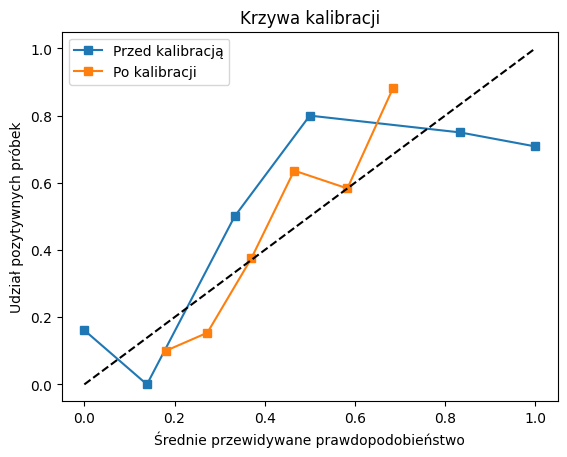

In [31]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

# Kalibracja modelu z wykorzystaniem CalibratedClassifierCV.
calibrated_model = CalibratedClassifierCV(model_titanic, method='sigmoid', cv=5)
calibrated_model.fit(X_train_titanic, y_train_titanic)

# Przewidywanie prawdopodobieństw po kalibracji
yhat_prob_titanic_calibrated = calibrated_model.predict_proba(X_test_titanic)[:, 1]

# Przewidywanie przypisania klasy na podstawie skalibrowanego prawdopodobieństwa
yhat_titanic_calibrated = calibrated_model.predict(X_test_titanic)

# Obliczanie Log-loss oraz F1 przed i po kalibracji
log_loss_before = log_loss(y_test_titanic, yhat_titanic_proba)
f1_before = f1_score(y_test_titanic, yhat_titanic_proba[:, 1] > 0.5)
auc_before = roc_auc_score(y_test_titanic, yhat_titanic_proba[:, 1])

brier_after = log_loss(y_test_titanic, yhat_prob_titanic_calibrated)
f1_after = f1_score(y_test_titanic, yhat_titanic_calibrated)
auc_after = roc_auc_score(y_test_titanic, yhat_prob_titanic_calibrated)

print(f'Log-loss score przed kalibracją: {log_loss_before:.4f}')
print(f'F1 przed kalibracją: {f1_before:.4f}')
print(f'ROC AUC przed kalibracją: {auc_before:.4f}')
print("\n\n")
print(f'Log-loss po kalibracji: {brier_after:.4f}')
print(f'F1 po kalibracji: {f1_after:.4f}')
print(f'ROC AUC po kalibracji: {auc_after:.4f}')

# Rysowanie krzywej kalibracji
prob_true, prob_pred = calibration_curve(y_test_titanic, yhat_titanic_proba[:, 1], n_bins=10)
prob_true_calibrated, prob_pred_calibrated = calibration_curve(y_test_titanic, yhat_prob_titanic_calibrated, n_bins=10)

plt.plot(prob_pred, prob_true, 's-', label='Przed kalibracją')
plt.plot(prob_pred_calibrated, prob_true_calibrated, 's-', label='Po kalibracji')
plt.plot([0, 1], [0, 1], 'k--')  # Idealna kalibracja
plt.xlabel('Średnie przewidywane prawdopodobieństwo')
plt.ylabel('Udział pozytywnych próbek')
plt.title('Krzywa kalibracji')
plt.legend(loc="best")
plt.show()

W pokazanym przykładzie widzimy, że po kalibracji spadła wartość log-loss, oraz wzrósł współczynnik F1.

# Regresja

W polskiej literaturze termin "regresja" często bywa utożsamiany z (prostą) regresją liniową, podczas gdy w anglojęzycznym piśmiennictwie termin ten odnosi się do szerszego zagadnienia przewidywania wartości numerycznych (ciągłych). Regresja to fundamentalne zadanie w uczeniu maszynowym, które polega na przewidywaniu wartości liczbowych na podstawie dostępnych danych wejściowych. Jakość modelu regresyjnego ocenia się za pomocą różnych metryk, które mierzą różnice między przewidywanymi a rzeczywistymi wartościami.

Formalnie:


```{glossary}
Regresja
    (ang. *regression*), w szerokim rozumieniu tego terminu, jest zadaniem w uczeniu maszynowym polegającym na przewidywaniu wartości numerycznych (ciągłych) na podstawie dostępnych danych wejściowych.

    Dany jest zbiór wejściowy $\mathcal{X}$ oraz zbiór wartości docelowych $\mathcal{Y} \subseteq \mathbb{R}$. Próbka ucząca $S = \left\{ (\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), \dots, (\mathbf{x}_m, y_m) \right\} \subseteq \mathcal{X} \times \mathcal{Y}$ składa się z $m$ par, gdzie każdy wektor wejściowy $\mathbf{x}_i \in \mathcal{X}$ jest losowany zgodnie z (nieznanym) rozkładem prawdopodobieństwa $D$, a odpowiadające mu etykiety $y_i \in \mathcal{Y}$ są generowane zgodnie z funkcją docelową $y = f(\mathbf{x}) + \epsilon$, gdzie $f: \mathcal{X} \to \mathbb{R}$ jest nieznaną funkcją, a $\epsilon$ jest nieredukowalnym błędem losowym, $\epsilon \sim \mathcal{N}(0, \sigma^2)$.

    Celem regresji jest znalezienie modelu (zwanego również **estymatorem**) funkcji $f$, który przybliży ją na podstawie próbki uczącej $S$.

    Ponieważ wartości docelowe należą do zbioru liczb rzeczywistych, stworzenie modelu, który przewiduje te wartości bezbłędnie, jest mało realistyczne. Dlatego w zadaniu regresji oczekuje się, aby model przewidywał wartości **możliwie jak najbliższe** rzeczywistym wartościom docelowym. Poziom spełnienia tego zadania oceniany jest za pomocą dedykowanych metryk.

    (ujednolicona definicja w oparciu o: {cite:ps}`mohri2012foundations`, {cite:ps}`deisenroth2020mathematics`, {cite:ps}`flach2012machine`)
```


Poniżej omówione zostaną najważniejsze metryki regresji, takie jak **błąd średniokwadratowy**/ ang. *Mean Square Error (MSE)*, **pierwiastek błędu średniokwadratowego**/ ang. *Root Mean Square Error (RMSE)*, **średni błąd bezwzględny** / ang. *Mean Absolute Error (MAE)* oraz **średni bezwzględny błąd procentowy**/ang. *Mean Absolute Percentage Error (MAPE)*. Dla każdej metryki podane będą wzory oraz przykłady kodu w Pythonie, wykorzystujące wbudowane zbiory danych z biblioteki `Scikit-learn`.

### Błąd średniokwadratowy / ang. *Mean Square Error (MSE)*


```{glossary}
Błąd średniokwadratowy
    ang. *Mean Square Error (MSE)*, to jedna z najczęściej używanych metryk do oceny modeli regresyjnych. MSE mierzy średnią kwadratową różnicę między przewidywanymi a rzeczywistymi wartościami. Podnoszenie błędów do kwadratu ma na celu podkreślenie większych odchyleń, co sprawia, że **MSE jest szczególnie czuła na duże błędy**.

    Z drugiej strony - forma równania umozliwia łatwe przekształcenia, które ułatwiają skracanie niektórych wyrażeń podczas liczenia np. gradientów błędów.


    Formalnie:

    $$
    \text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
    $$

    gdzie:
    - $y_i$ to rzeczywista wartość,
    - $\hat{y}_i$ to przewidywana wartość,
    - $N$ to liczba obserwacji.
```


**Przykład kodu w Pythonie**:

In [32]:
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Ładowanie danych Boston Housing
data = fetch_california_housing()
X, y = data.data, data.target

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Trenowanie modelu regresji liniowej
model = LinearRegression()
model.fit(X_train, y_train)

# Przewidywanie wartości na zbiorze testowym
y_pred = model.predict(X_test)

# Obliczanie MSE
mse = mean_squared_error(y_test, y_pred)

print(f'Błąd średniokwadratowy (MSE): {mse:.4f}')

Błąd średniokwadratowy (MSE): 0.5306


### Pierwiastek błędu średniokwadratowego / ang. *Root Mean Square Error (RMSE)*

```{glossary}

Pierwiastek błędu średniokwadratowego
    ang. *Root Mean Square Error (RMSE)*, jest metryką będącą pierwiastkiem kwadratowym z MSE. RMSE, podobnie jak MSE, karze większe błędy, ale ma tę zaletę, że jest wyrażona w tych samych jednostkach co przewidywane wartości, co ułatwia interpretację.

    Wzór na RMSE:

    $$
    \text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2}
    $$
```

**Przykład kodu w Pythonie**:

In [33]:
import numpy as np

# Obliczanie RMSE
rmse = np.sqrt(mse)
print(f'Pierwiastek błędu średniokwadratowego (RMSE): {rmse:.4f}')

Pierwiastek błędu średniokwadratowego (RMSE): 0.7284


### Średni błąd bezwzględny / ang. *Mean Absolute Error (MAE)*

```{glossary}
Średni błąd bezwzględny
    ang. *Mean Absolute Error (MAE)* mierzy średnią wartość bezwzględnej różnicy między przewidywaniami a rzeczywistymi wartościami. MAE jest mniej czuła na duże błędy w porównaniu do MSE i RMSE, ponieważ nie wykonuje operacji potęgowania. Z drugiej strony - ze względu na użycie wartości bezwzględnej, nie wskazuje na to, czy model przeszacowuje czy niedoszacowuje wartości.

    Wzór na MAE:

    $$
    \text{MAE} = \frac{1}{N} \sum_{i=1}^{N} |y_i - \hat{y}_i|
    $$
```


**Przykład kodu w Pythonie**:

In [34]:
from sklearn.metrics import mean_absolute_error

# Obliczanie MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Średni błąd bezwzględny (MAE): {mae:.4f}')

Średni błąd bezwzględny (MAE): 0.5272


### Średni bezwzględny błąd procentowy / ang. *Mean Absolute Percentage Error (MAPE)*

```{glossary}
Średni bezwzględny błąd procentowy
    ang. *Mean Absolute Percentage Error (MAPE)* mierzy średni procentowy błąd przewidywań w stosunku do rzeczywistych wartości. MAPE jest szczególnie przydatna, gdy chcemy ocenić dokładność przewidywań w kategoriach procentowych, a zatem relatywnie łatwo interpretowalna. Jednakże, ze względu na użycie wartości bezwzględnej, nie wskazuje na to, czy model przeszacowuje czy niedoszacowuje wartości.

    Wzór na MAPE:

    $$
    \text{MAPE} = \frac{100\%}{N} \sum_{i=1}^{N} \left|\frac{y_i - \hat{y}_i}{y_i}\right|
    $$
```

```{admonition} Mylące wartości MAPE
:class: tip
Warto zwrócić uwagę, że metryka MAPE może być myląca, w dwóch sytuacjach.
1. Gdy wartości rzeczywiste są bliskie zeru, ponieważ wtedy wartość mianownika jest bardzo mała, co może prowadzić do niestabilnych wyników.
2. MAPE może wykazać **jednakową różnicę procentową** dla kompletnie różnych skal wartości. Przykładowo:
> - Model 1: rzeczywista wartość = 100, przewidywana wartość = 110, MAPE = 10%,
> - Model 2: rzeczywista wartość = 1000, przewidywana wartość = 1100, MAPE = 10%.

W niektórych zastosowaniach biznesowych (np. finansach), różnica 10% dla wartości 100 i 1000 może mieć zupełnie różne konsekwencje.
```

**Przykład kodu w Pythonie**:

In [35]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Obliczanie MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Średni bezwzględny błąd procentowy (MAPE): {mape:.2f}%')

Średni bezwzględny błąd procentowy (MAPE): 31.75%
